# Tugas Besar Pembelajaran Mesin Lanjut

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Muhammad Rizky Irsyad - 1301180347

Hasbi Dawami - 1301180320

## 1. Evaluasi Masalah
Berdasarkan dataset yang telah diberikan, Goals atau tujuan akhir dari tugas ini adalah untuk memprediksi label "RainToday" & "RainTomorrow"

## 2. Data Preprocessing
Langkah pertama yang dapat kita lakukan adalah import library-library yang dibutuhkan untuk mengolah data

In [ ]:
import pandas as pd
import missingno as msno
from sklearn.preprocessing import LabelEncoder

Tahapan yang akan dilakukan pada tahapan preprocessing data adalah kurang lebih sebagai berikut : 

1. Drop Missing Value
2. Converting Datatime
3. Encoding

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Sekarang kita akan coba telusuri data

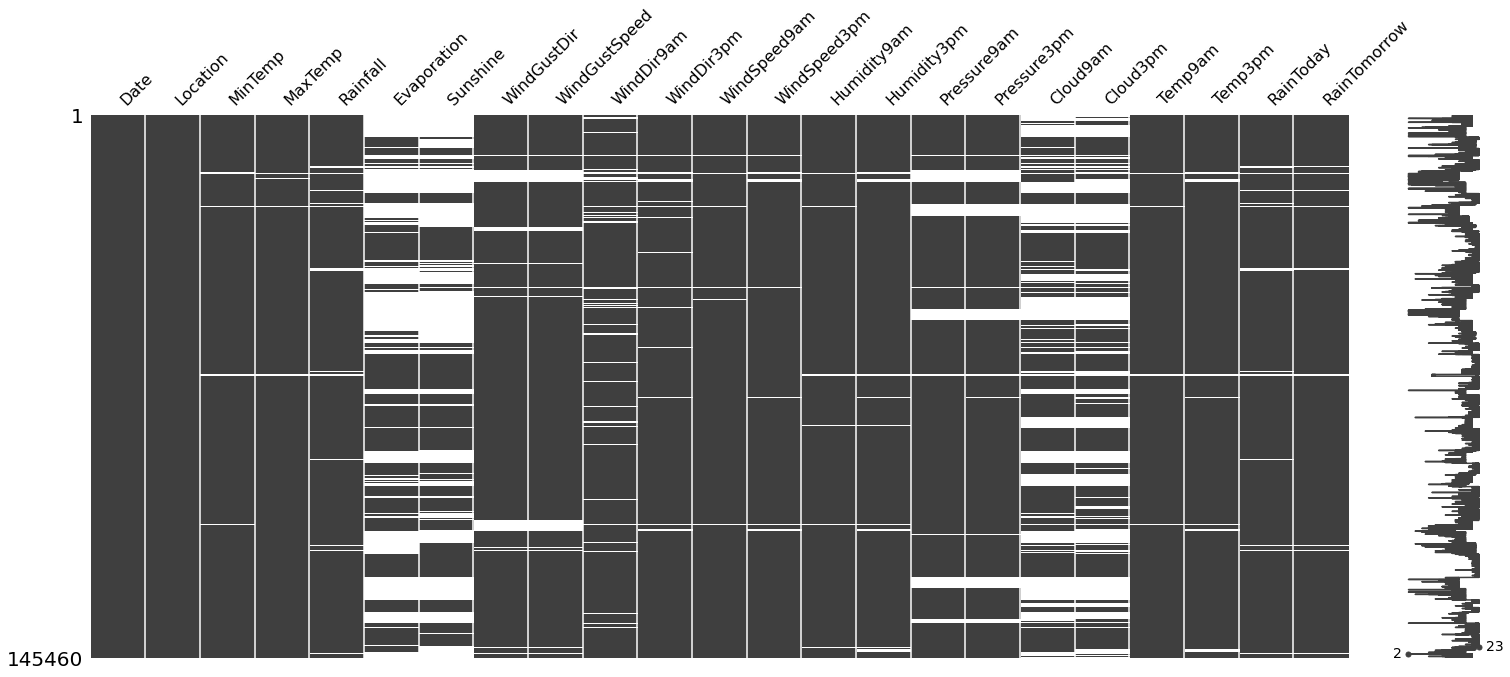

In [ ]:
msno.matrix(df)

Bisa dilihat pada fitur kolom Evaporation, Sunshine, Cloud9am, Cloud3pm terdapat banyak data yang hilang, kita akan drop kolom tersebut beserta baris-baris yang missing data

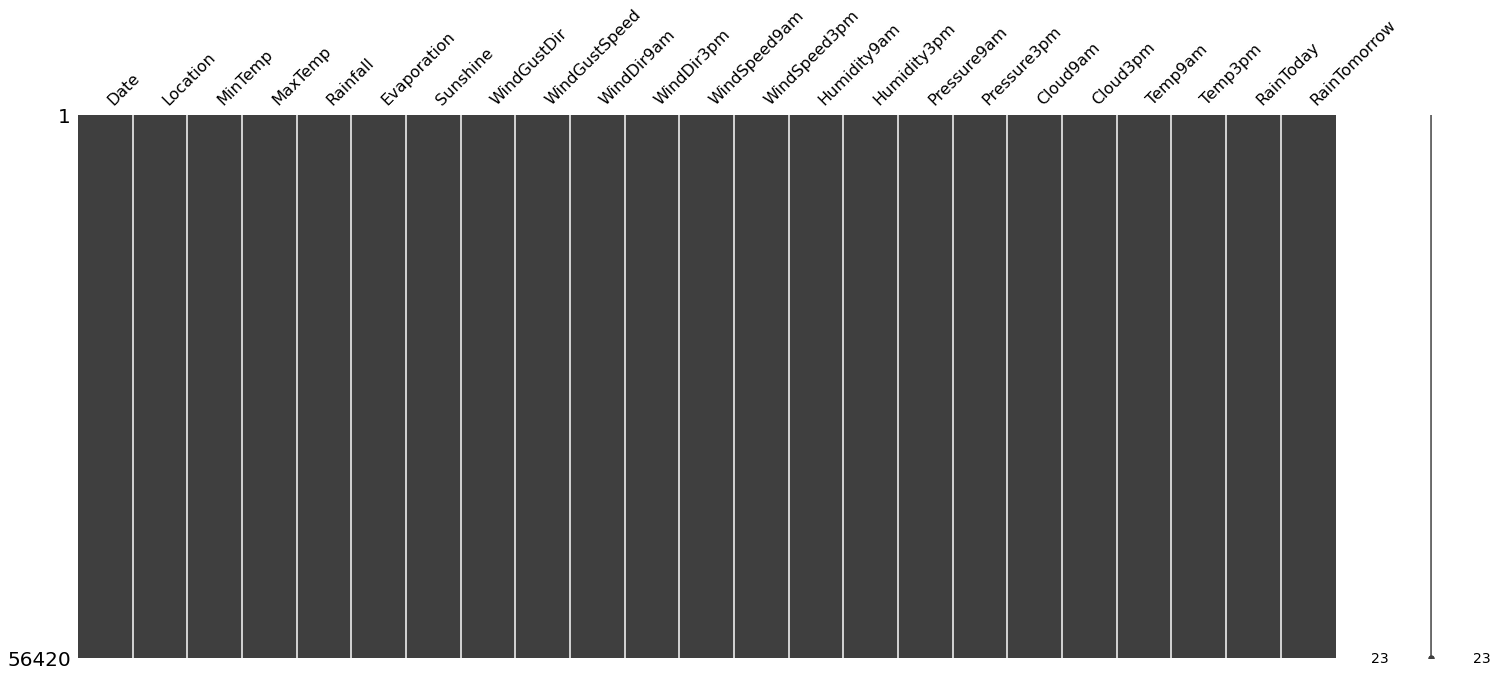

In [ ]:
df.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'])
df.dropna(inplace=True)
msno.matrix(df)

Sekarang kita akan mengubah Format datetime menjadi beberapa kolom

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [ ]:
#Masukkan Nilai ke kolom baru
df['Date_Day'] = df['Date'].dt.day
df['Date_Week'] = df['Date'].dt.week
df['Date_Year'] = df['Date'].dt.year
df = df.drop(columns=['Date'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_Day,Date_Week,Date_Year
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,1,1,2009
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,2,1,2009
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,4,1,2009
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,5,2,2009
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No,6,2,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No,20,25,2017
142299,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No,21,25,2017
142300,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No,22,25,2017
142301,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No,23,25,2017


Pada tahap ini, kita akan melakukan encoding data categorical ke numerical


In [ ]:
#Label Encoder
df['Location'] = LabelEncoder().fit_transform(df.Location)
df['WindGustDir'] = LabelEncoder().fit_transform(df.WindGustDir)
df['WindDir9am'] = LabelEncoder().fit_transform(df.WindDir9am)
df['WindDir3pm'] = LabelEncoder().fit_transform(df.WindDir3pm)

#Ordinal Encoder
replaces_data = {"RainToday": {"Yes": 1, "No": 0}}
df.replace(replaces_data, inplace=True)
replaces_data = {"RainTomorrow": {"Yes": 1, "No": 0}}
df.replace(replaces_data, inplace=True)

In [ ]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_Day,Date_Week,Date_Year
6049,4,17.9,35.2,0.0,12.0,12.3,11,48.0,1,12,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0,1,1,2009
6050,4,18.4,28.9,0.0,14.8,13.0,8,37.0,10,10,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0,2,1,2009
6052,4,19.4,37.6,0.0,10.8,10.6,5,46.0,5,6,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0,4,1,2009
6053,4,21.9,38.4,0.0,11.4,12.2,14,31.0,14,15,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0,5,2,2009
6054,4,24.2,41.0,0.0,11.2,8.4,14,35.0,7,14,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0,6,2,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,6,19.3,33.4,0.0,6.0,11.0,1,35.0,9,4,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0,20,25,2017
142299,6,21.2,32.6,0.0,7.6,8.6,0,37.0,9,9,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0,21,25,2017
142300,6,20.7,32.8,0.0,5.6,11.0,0,33.0,0,13,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0,22,25,2017
142301,6,19.5,31.8,0.0,6.2,10.6,2,26.0,9,6,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0,23,25,2017


##3. Pemodelan

Kita akan membangun 2 model tpot untuk memprediksi 2 label, yaitu RainToday dan RainTomorrow

In [ ]:
!pip install deap update_checker tqdm stopit xgboost

     |████████████████████████████████| 163kB 4.4MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11954 sha256=cabd4433e8f9f57894563d571ab635d6be1d13c8edf51490d124ddb320f42d3d
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit


In [ ]:
!pip install tpot

     |████████████████████████████████| 92kB 3.9MB/s 
     |████████████████████████████████| 166.7MB 39kB/s 
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier

X = df.drop(columns=['RainToday','RainTomorrow'])

#Rain Today
y1 = df['RainToday']
#Rain Tomorrow
y2 = df['RainTomorrow']

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#Data Split
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y1, train_size=0.75, 
                                                        test_size=0.25, random_state=5)
#Model For RainToday
tpot_today = TPOTClassifier(generations=5, population_size=20, cv=5, 
                            random_state=10, verbosity=2, n_jobs=-1)
tpot_today.fit(X1_train, y1_train)


Generation 1 - Current best internal CV score: 1.0

Generation 2 - Current best internal CV score: 1.0

Generation 3 - Current best internal CV score: 1.0

Generation 4 - Current best internal CV score: 1.0

Generation 5 - Current best internal CV score: 1.0

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.2, min_samples_leaf=9, min_samples_split=20, n_estimators=100)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               log_file=None, max_eval_time_mins=5, max_time_mins=None,
               memory=None, mutation_rate=0.9, n_jobs=-1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=10, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [ ]:
tpot_today.score(X1_test, y1_test)

0.9999291031549096

In [ ]:
#Data Split
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, train_size=0.75, 
                                                        test_size=0.25, random_state=5)
#Model For RainTomorrow
tpot_tomorrow = TPOTClassifier(generations=5, population_size=20, cv=5, 
                            random_state=10, verbosity=2, n_jobs=-1)
tpot_tomorrow.fit(X2_train, y2_train)


Generation 1 - Current best internal CV score: 0.8570010634526763

Generation 2 - Current best internal CV score: 0.8601205246366537

Generation 3 - Current best internal CV score: 0.8601205246366537

Generation 4 - Current best internal CV score: 0.8601205246366537

Generation 5 - Current best internal CV score: 0.8605222734254993

Best pipeline: ExtraTreesClassifier(StandardScaler(input_matrix), bootstrap=False, criterion=gini, max_features=0.6500000000000001, min_samples_leaf=3, min_samples_split=12, n_estimators=100)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               log_file=None, max_eval_time_mins=5, max_time_mins=None,
               memory=None, mutation_rate=0.9, n_jobs=-1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=10, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [ ]:
tpot_tomorrow.score(X2_test, y2_test)

0.8613966678482807

## 4. Eksperimen

Kita akan mengubah nilai dari generasi dan populasi untuk melihat apakah akan ada perbedaan pada skor model.

In [ ]:
#Data Split
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y2, train_size=0.75, 
                                                        test_size=0.25, random_state=5)
#Model For RainTomorrow
tpot_tomorrow2 = TPOTClassifier(generations=3, population_size=33, cv=5, 
                            random_state=10, verbosity=2, n_jobs=-1)
tpot_tomorrow2.fit(X2_train, y2_train)


Generation 1 - Current best internal CV score: 0.859033439678601

Generation 2 - Current best internal CV score: 0.8610894481862224

Generation 3 - Current best internal CV score: 0.8613966678482807

Best pipeline: RandomForestClassifier(PolynomialFeatures(input_matrix, degree=2, include_bias=False, interaction_only=False), bootstrap=True, criterion=entropy, max_features=0.05, min_samples_leaf=2, min_samples_split=5, n_estimators=100)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=3,
               log_file=None, max_eval_time_mins=5, max_time_mins=None,
               memory=None, mutation_rate=0.9, n_jobs=-1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=33,
               random_state=10, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [ ]:
tpot_tomorrow2.score(X2_test, y2_test)

0.8616802552286423